## Loading and Handling TS in Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [8]:
data = pd.read_csv('C:/Users/sande/Major Project/Dataset/co2.csv',parse_dates=['Year'])
data = data.set_index('Year')
data=data['1950-01-01':]
print(data.head())
print ('\n Data Types:')
print (data.dtypes)

            Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
Year                                                                        
1950-01-01   1630        97          423        1070      18           23   
1951-01-01   1767       115          479        1129      20           24   
1952-01-01   1795       124          504        1119      22           26   
1953-01-01   1841       131          533        1125      24           27   
1954-01-01   1865       138          557        1116      27           27   

            Per Capita  
Year                    
1950-01-01        0.64  
1951-01-01        0.69  
1952-01-01        0.68  
1953-01-01        0.69  
1954-01-01        0.69  

 Data Types:
Total            int64
Gas Fuel         int64
Liquid Fuel      int64
Solid Fuel       int64
Cement           int64
Gas Flaring      int64
Per Capita     float64
dtype: object


Reading as datetime format:

In [9]:
#check datatype of index
data.index

DatetimeIndex(['1950-01-01', '1951-01-01', '1952-01-01', '1953-01-01',
               '1954-01-01', '1955-01-01', '1956-01-01', '1957-01-01',
               '1958-01-01', '1959-01-01', '1960-01-01', '1961-01-01',
               '1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01', '1967-01-01', '1968-01-01', '1969-01-01',
               '1970-01-01', '1971-01-01', '1972-01-01', '1973-01-01',
               '1974-01-01', '1975-01-01', '1976-01-01', '1977-01-01',
               '1978-01-01', '1979-01-01', '1980-01-01', '1981-01-01',
               '1982-01-01', '1983-01-01', '1984-01-01', '1985-01-01',
               '1986-01-01', '1987-01-01', '1988-01-01', '1989-01-01',
               '1990-01-01', '1991-01-01', '1992-01-01', '1993-01-01',
               '1994-01-01', '1995-01-01', '1996-01-01', '1997-01-01',
               '1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
               '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
      

In [10]:
#convert to time series:
ts = data['Total']
ts.head(10)

Year
1950-01-01    1630
1951-01-01    1767
1952-01-01    1795
1953-01-01    1841
1954-01-01    1865
1955-01-01    2042
1956-01-01    2177
1957-01-01    2270
1958-01-01    2330
1959-01-01    2454
Name: Total, dtype: int64

### Indexing TS arrays:

In [12]:
#1. Specific the index as a string constant:
ts['1959-01-01']

2454

In [13]:
#2. Import the datetime library and use 'datetime' function:
from datetime import datetime
ts[datetime(1959,1,1)]

2454

#Get range:

In [14]:
#1. Specify the entire range:
ts['1959-01-01':'1969-05-01']

Year
1959-01-01    2454
1960-01-01    2569
1961-01-01    2580
1962-01-01    2686
1963-01-01    2833
1964-01-01    2995
1965-01-01    3130
1966-01-01    3288
1967-01-01    3393
1968-01-01    3566
1969-01-01    3780
Name: Total, dtype: int64

In [15]:
#2. Use ':' if one of the indices is at ends:
ts[:'1959-05-01']

Year
1950-01-01    1630
1951-01-01    1767
1952-01-01    1795
1953-01-01    1841
1954-01-01    1865
1955-01-01    2042
1956-01-01    2177
1957-01-01    2270
1958-01-01    2330
1959-01-01    2454
Name: Total, dtype: int64

Note: ends included here

In [16]:
#All rows of 1962:
ts['1959']

Year
1959-01-01    2454
Name: Total, dtype: int64

# Checking for stationarity

## Plot the time-series

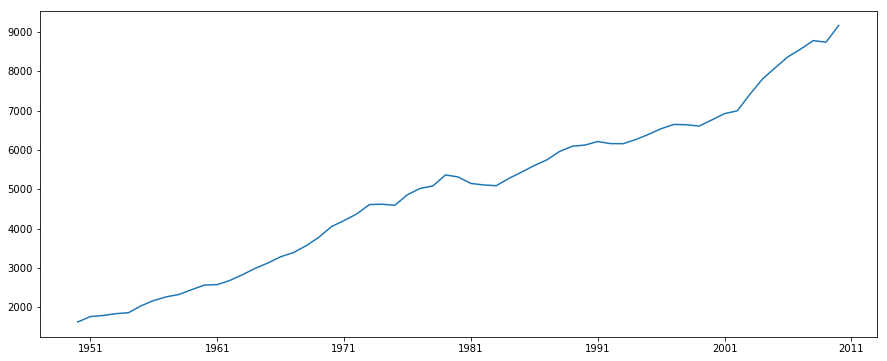

In [17]:
plt.plot(ts)

### Function for testing stationarity

In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


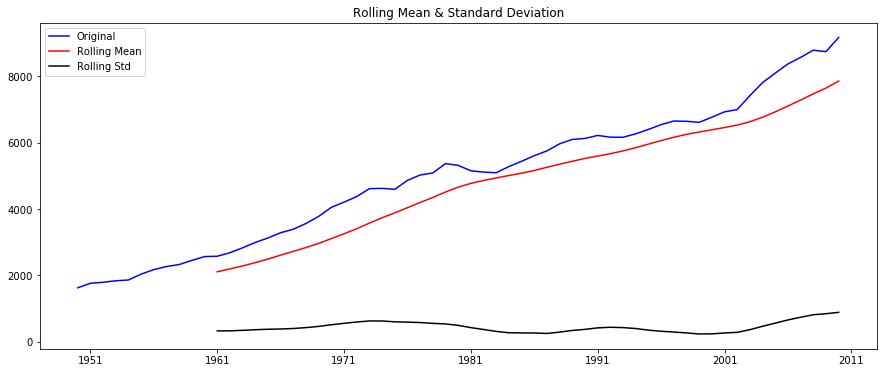

Results of Dickey-Fuller Test:
Test Statistic                  1.211008
p-value                         0.996061
#Lags Used                      1.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [19]:
test_stationarity(ts)

# Making TS Stationary


## Estimating & Eliminating Trend


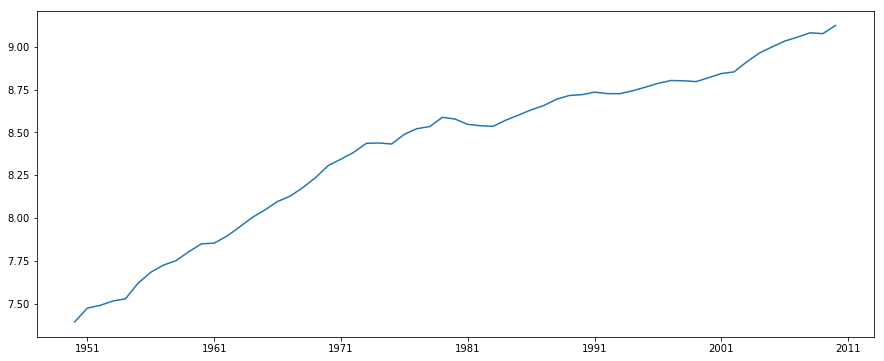

In [20]:
ts_log = np.log(ts)
plt.plot(ts_log)

## Smoothing:

### Moving average

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


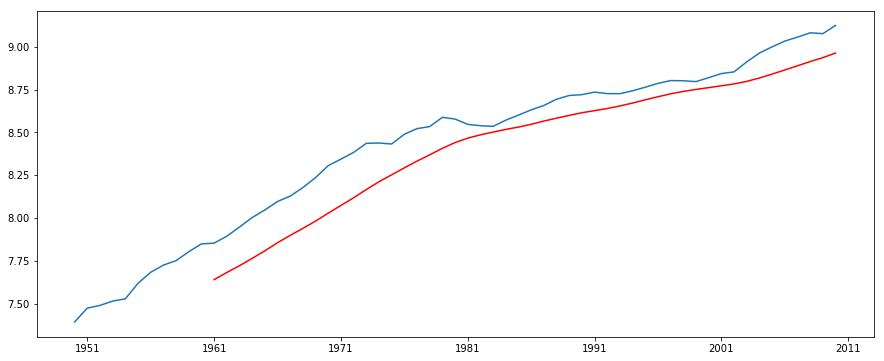

In [21]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [22]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Year
1950-01-01        NaN
1951-01-01        NaN
1952-01-01        NaN
1953-01-01        NaN
1954-01-01        NaN
1955-01-01        NaN
1956-01-01        NaN
1957-01-01        NaN
1958-01-01        NaN
1959-01-01        NaN
1960-01-01        NaN
1961-01-01    0.21254
Name: Total, dtype: float64

In [23]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

Year
1961-01-01    0.212540
1962-01-01    0.211181
1963-01-01    0.225127
1964-01-01    0.238073
1965-01-01    0.237935
Name: Total, dtype: float64

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


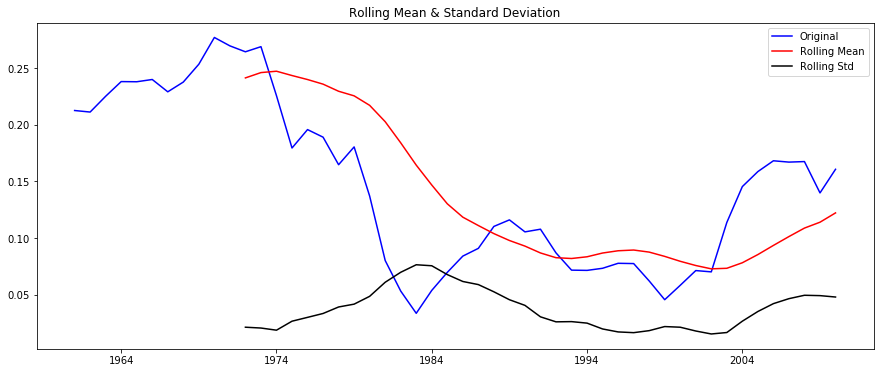

Results of Dickey-Fuller Test:
Test Statistic                 -2.172811
p-value                         0.216261
#Lags Used                      7.000000
Number of Observations Used    42.000000
Critical Value (1%)            -3.596636
Critical Value (5%)            -2.933297
Critical Value (10%)           -2.604991
dtype: float64


In [24]:
test_stationarity(ts_log_moving_avg_diff)

### Exponentially Weighted Moving Average

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


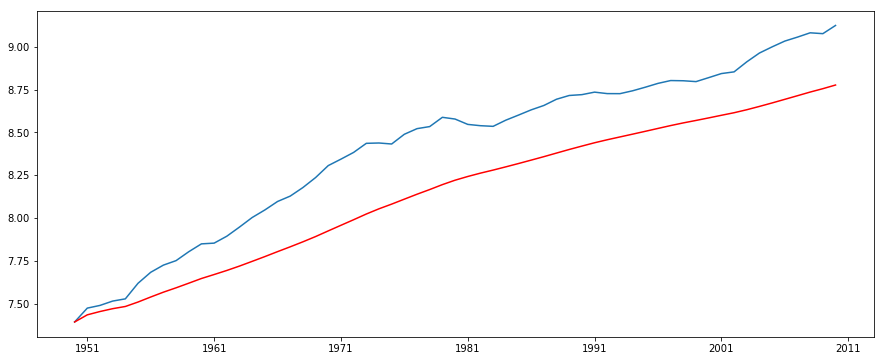

In [25]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
# expwighted_avg.plot(style='k--')

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


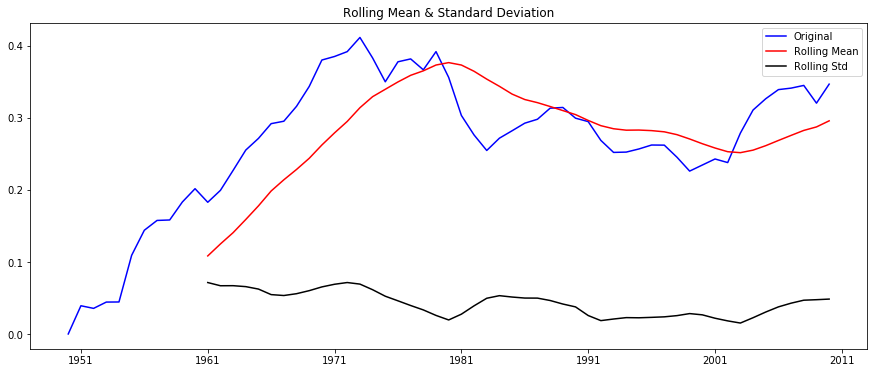

Results of Dickey-Fuller Test:
Test Statistic                 -2.003647
p-value                         0.284976
#Lags Used                      7.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


In [26]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

### Differencing:

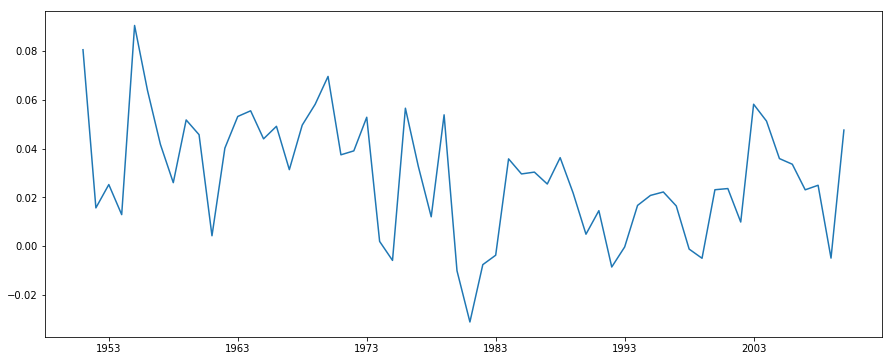

In [27]:
#Take first difference:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


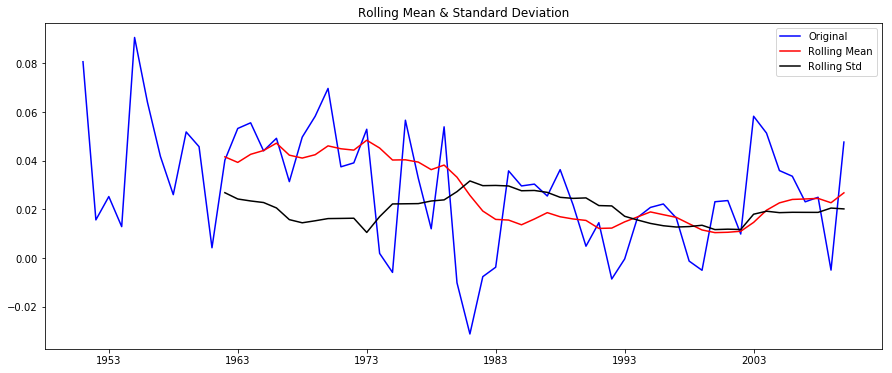

Results of Dickey-Fuller Test:
Test Statistic                 -5.436385
p-value                         0.000003
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [28]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposition:

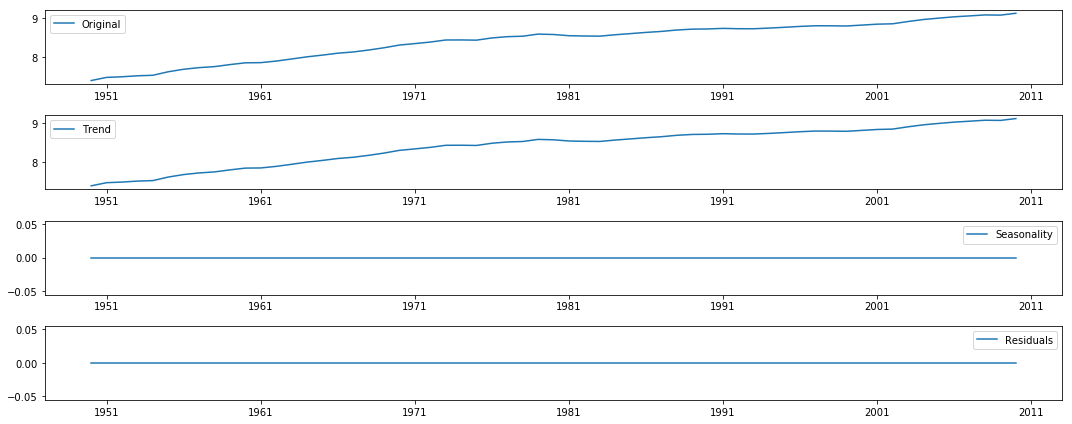

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


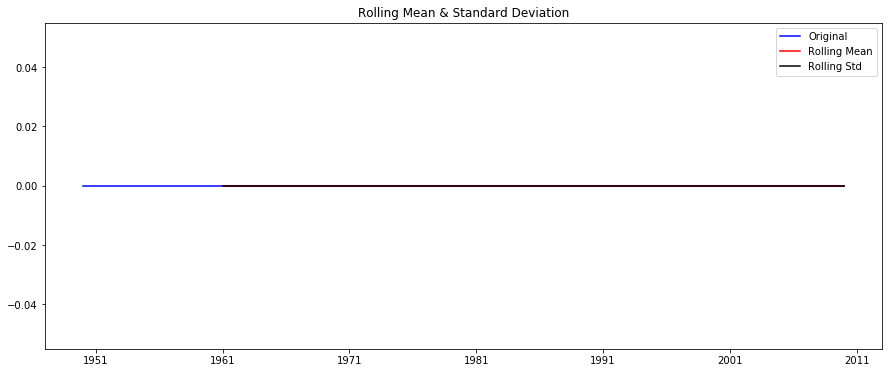

Results of Dickey-Fuller Test:
Test Statistic                       NaN
p-value                              NaN
#Lags Used                      0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
C:\Users\sande\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\sande\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\sande\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\sande\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1735: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


In [30]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

# Final Forecasting

In [31]:
from statsmodels.tsa.arima_model import ARIMA

### ACF & PACF Plots

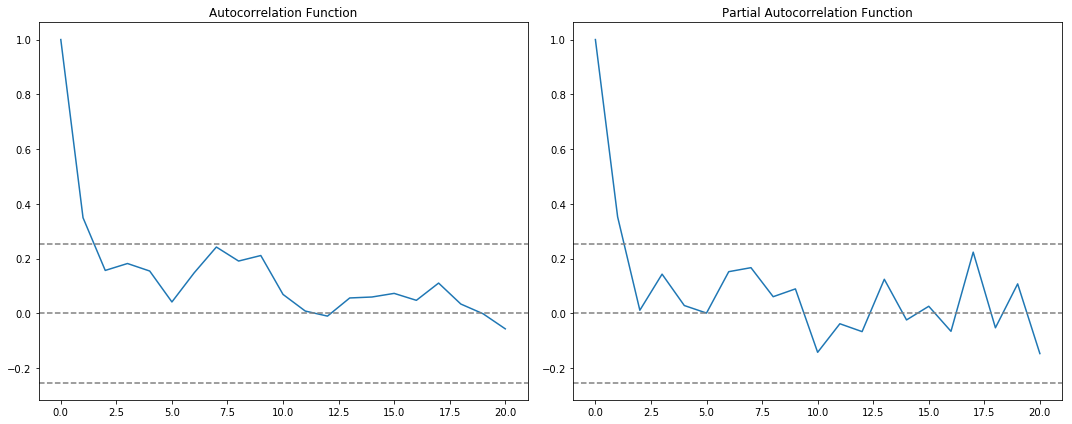

In [32]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf  

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:    
plt.subplot(121)    
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

### AR Model:

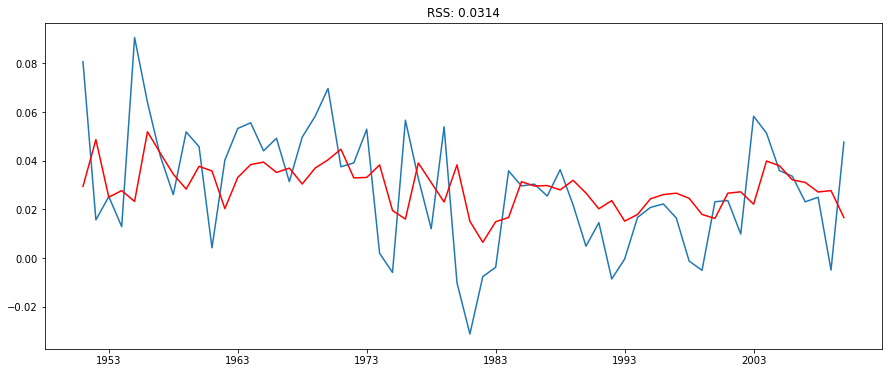

In [33]:
#MA model:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

### MA Model

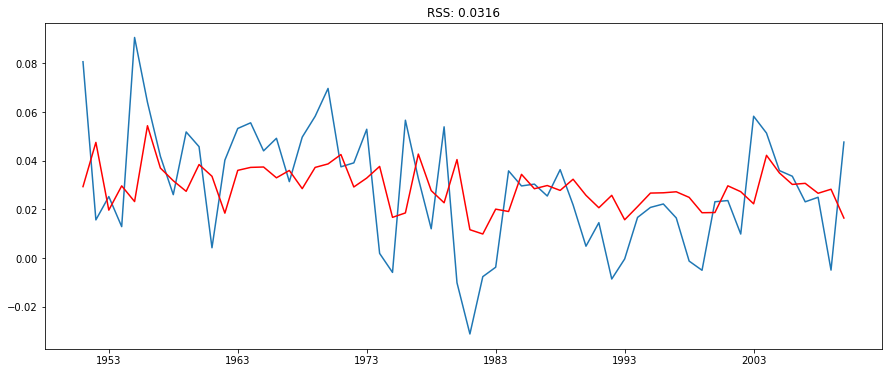

In [34]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### ARIMA Model:

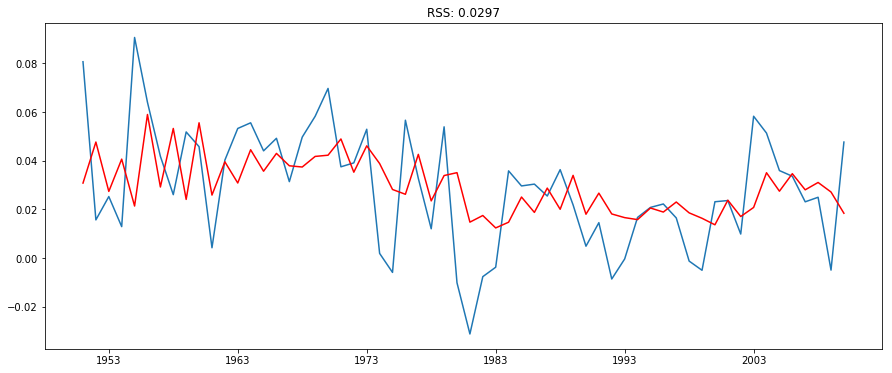

In [35]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### Convert to original scale:

In [37]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
1951-01-01    0.030843
1952-01-01    0.047708
1953-01-01    0.027419
1954-01-01    0.040680
1955-01-01    0.021417
dtype: float64


In [38]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Year
1951-01-01    0.030843
1952-01-01    0.078551
1953-01-01    0.105970
1954-01-01    0.146650
1955-01-01    0.168066
dtype: float64


In [39]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\sande\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


Year
1950-01-01    7.396335
1951-01-01    7.427178
1952-01-01    7.474886
1953-01-01    7.502305
1954-01-01    7.542985
dtype: float64

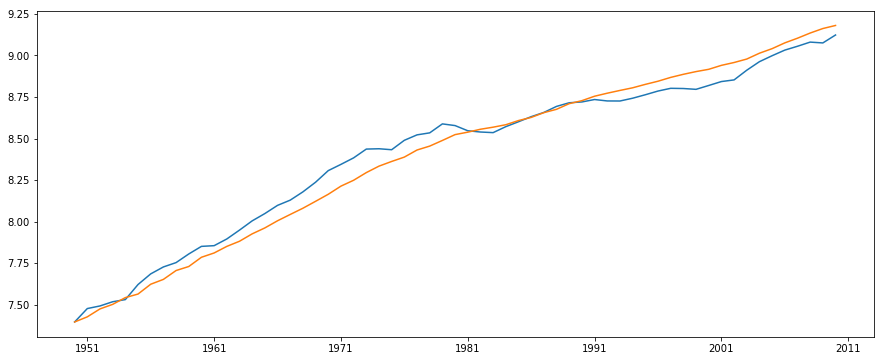

In [40]:
plt.plot(ts_log)
plt.plot(predictions_ARIMA_log)

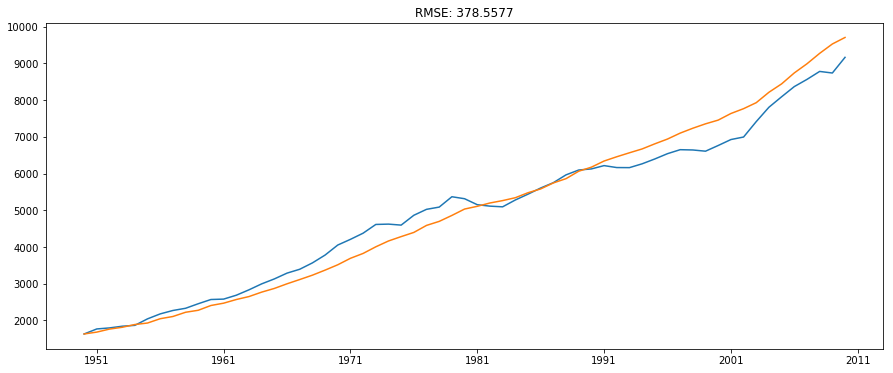

In [41]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))